# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

##  Optical recognition of handwritten digits dataset

 jest zbiorem ręcznie pisanych cyfr.

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

### Wczytanie danych 

Jest wiele sposobów załadowania danych mnist do pamięci. Możemy skorzystać z funkcji `fetch_mldata`. Ważne jest by nie umieszczać danych w katalogu domowym. Możemy użyc katalogu `/tmp`. Ponieważ potrzebujemy danych tyko do odczytu, wystarczy jedna kopia dla wszystkich.

In [4]:
from  sklearn import datasets

In [5]:
nist = datasets.load_digits()

In [6]:
#print(nist.DESCR)

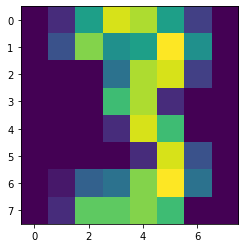

In [7]:
plt.imshow(nist.data[13].reshape(8, 8))

### Zadanie 1.

Dokonaj podziału danych i etykiet na dwa zbiory - trenujący i testowy o rozmiarach w stosunkiu 5:1.

In [8]:
# print(nist.data)
# print(nist.images)

In [9]:
x = nist.data.astype(np.float32)
y = nist.target

train, test, train_labels, test_labels = train_test_split(x, y, test_size=0.2) # 1/5

print(train[123].dtype)
print(train[123].shape)

print(len(y))

float32
(64,)
1797


In [10]:
assert train.shape == (1437, 64)
assert test.shape ==  (360, 64)
assert train_labels.shape == (1437,)
assert test_labels.shape == (360,)
assert train[123].dtype == np.float32
assert train[123].shape == (64,)

### Zadanie 2.

Wyświetl dla losowego przykładu etykietę oraz cyfrę. Zauważ, że cyfry są obrazkami `8x8`.

indeks: 1489
etykieta: 5


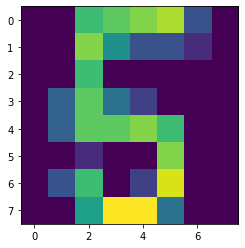

In [11]:
import random
rndm = random.randint(0, len(y)+1)

print('indeks:', rndm)
print('etykieta:', nist.target[rndm])

plt.imshow(nist.images[rndm])
plt.show() 

6


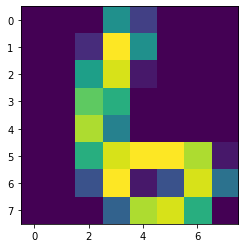

In [12]:
i = random.randint(0, len(test))

print(test_labels[i])
plt.imshow(test[i].reshape(8, 8))

## NIST

Wykonaj klasyfikacje klasyfikatorem liniowym.
Jedną z możliwoście jest 

In [13]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(train, train_labels)

print(clf.coef_.shape)
print(clf.intercept_.shape)
clf.score(test, test_labels)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(10, 64)
(10,)


0.95

In [14]:
assert clf.coef_.shape == (10,64)
assert clf.intercept_.shape == (10,)
assert clf.score(test,test_labels) > 0.95
assert clf.score(test,test_labels) < 0.98

AssertionError: 

## NIST z klasyfikatorem kNN

Korzystając z pakietu `sklearn` poklasyfikuj dane MNIST.


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5).fit(train, train_labels)

knn.score(test, test_labels)

0.9777777777777777

### Predykcja

Znajdź przykłady (np. 10 sztuk) dla których klasyfikator się pomylił. Zastanów się czy człowiek też mógłby się pomylić w tych przypadkach.

In [16]:
np.sum(clf.predict(test) == test_labels),test_labels.shape[0]

(342, 360)

In [17]:
# # KNN

# #print(knn.predict(test) == test_labels)  # czy odp poprawna
# mistakes = []

# for x in range(len(test)):
#     if knn.predict(test)[x] != test_labels[x]:
#         mistakes.append(x)

# print('ilosc blednych:', len(mistakes))
# print('indeksy blednych:', mistakes)

# if len(mistakes) > 0:
#     idx = mistakes[0]
#     plt.imshow(train[idx].reshape(8, 8))
#     plt.show()
#     print('\n{}. indeks bledny,'.format(idx), 'prawidlowa etykieta:', train_labels[idx])

[7] 4


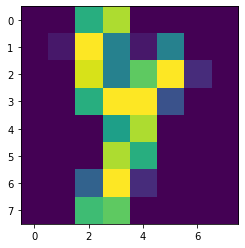

[3] 9


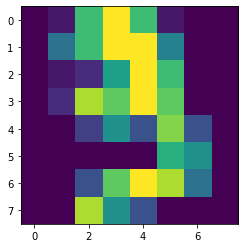

[7] 4


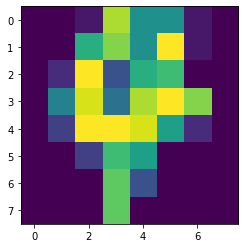

[1] 9


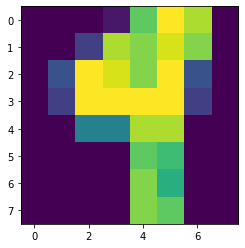

[1] 8


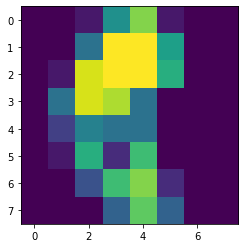

[9] 5


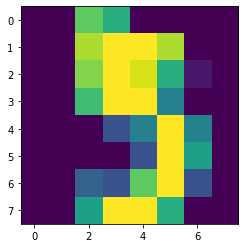

[1] 8


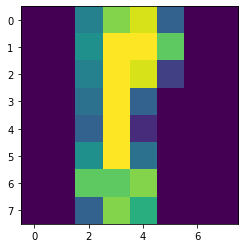

[4] 9


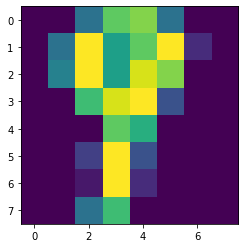

In [18]:
# inne knn

np.sum(knn.predict(test) == test_labels), test_labels.shape[0]

for i in range(360):
    Z = knn.predict(test[i:i+1])
    P = test_labels[i]
    
    if Z != P:
        print(Z, P)
        plt.imshow(test[i].reshape(8, 8))
        plt.show()

In [ ]:
# CLF 

# print(clf.predict(test) == test_labels)  # czy odp poprawna

mistakes = []

for x in range(len(test)):
    if clf.predict(test)[x] != test_labels[x]:
        mistakes.append(x)

print('ilosc blednych:', len(mistakes))
print('indeksy blednych:', mistakes)

idx = mistakes[2]

print('\n{}. indeks bledny,'.format(idx), 'prawidlowa etykieta:', train_labels[idx])
plt.imshow(train[idx].reshape(8, 8))
plt.show()

In [ ]:
from sklearn import linear_model
from sklearn import preprocessing

##  NIST z klasyfikatorem liniowym

Poklasyfikuj dane MNIST klasyfikatorem SVM, korzystając z implementacji `linear_model.LogisticRegression()` 

- z dokumentacji przeczytaj jak zaimplementowana jest klasyfikacja wieloklasowa.


In [ ]:
clf = LogisticRegression(random_state=0, multi_class='ovr').fit(train, train_labels)

In [ ]:
assert clf.score(test,test_labels) > 0.95
assert clf.predict_proba(test).shape[1] == 10

### Historgram

Narysuj histogram prawdopodobieństw klasyfikacji dla kilku dobrych i źle poklasyfikowanych przykładów 

In [ ]:
bad_idx = np.where(clf.predict(test) != test_labels)
#print(bad_idx)
pred = clf.predict_proba(test)[bad_idx]
#print(pred)

print(bad_idx)

for i in pred:
    plt.hist(i)


In [ ]:
for i in pred:
    plt.plot(i, 'o-')

### Macierz pomyłek

Wylicz i przedstaw graficznie  macierz pomyłek dla klasyfikatora liniowego.
Wykorzystaj zbiór testowy!

In [ ]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(test_labels, clf.predict(test))

print(M)
plt.matshow(M, vmax=5)
plt.colorbar()

In [ ]:
assert M.shape == (10,10)
np.sum(M.diagonal()) > 0.9*test.shape[0]

##  NIST z klasyfikatorem SVM

Poklasyfikuj dane MNIST klasyfikatorem SVM, korzystając z implementacji `sklearn` 

 - należy zastosować skalowanie danych (np. `preprocessing.StandardScaler`)


In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler(with_std = True)
scaler.fit(train)
#scaler.transform(train)

clf = svm.SVC(decision_function_shape='ovo', kernel='rbf')
clf.fit(scaler.transform(train), train_labels)
clf.score(scaler.transform(test), test_labels)

In [ ]:
np.sum(clf.predict(scaler.transform(test)) == test_labels),test_labels.shape[0]

##  NIST z klasyfikatorem SVM w zredukowanej przestrzeni danych (PCA)

Wykonaj redukcję danych z pomocą PCA, np.:

    pca = decomposition.PCA(n_components=50, whiten=True,\
                            svd_solver='randomized')
                            
Zmniejszając wymiar przestrzeni można pokusić się o zwiększenie zbioru trenującego!

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=50, whiten=True, svd_solver='randomized')

pca.fit(train)
train_pca = pca.transform(train)
test_pca = pca.transform(test)
clf.fit(train_pca, train_labels)

clf.score(test_pca, test_labels)